# Лабораторна робота №1. Байбула Кирило Аленович ДО-3. Варіант 70

## Умова

Знайти найбiльший корiнь нелiнiйного рiвняння $ x^{3} + 6x^{2} + 9x + 2 = 0 $ методом Ньютона i модифiкованим Ньютона з точнiстю $ \varepsilon = 10^{−4} $. Знайти апрiорну та апостерiорну оцiнку кiлькостi крокiв. Початковий промiжок та початкове наближення обрати однакове для обох методiв (якщо це можливо), порiвняти результати роботи
методiв мiж собою.

## Оцінка

Нижче реалізація функції $ f(x) = x^{3} + 6x^{2} + 9x + 2 $ як Python лямбда функція, яка і буде оцінюватися у коді далі. Також одразу позначимо точність через константу `EPSILON`:

In [1]:
f = lambda x: x**3 + 6 * (x**2) + 9 * x + 2

EPSILON = 10 ** (-4)

Створимо множину визначень функції $f(x)$, таку що $X = [-4, 1]$ за допомогою модуля `numpy`.

In [2]:
import numpy as np

# для графіка вистачить і 100 точок
X = np.linspace(-4,1,100)

Так само, відповідну множину значень $ Y = \{ f(x) |\ x \in X \} $.

In [3]:
Y = [f(x) for x in X]

### Оцінка корення за допомогою графіка

Використовуючи бібліотеку `matplotlib`, функцію і множини створенні раніше, намалюємо графік утвореної функції із осями координат.

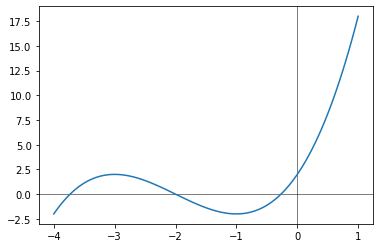

In [4]:
import matplotlib.pyplot as plt

plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)

plt.plot(X, Y)
plt.show()

Корені знаходяться у точках, де графік перетинає вісь координат $OX$, тобто:

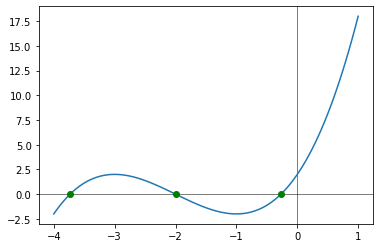

In [5]:
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)

plt.plot(X, Y)
plt.plot(-3.7321, 0, "go")
plt.plot(-2.0, 0, "go")
plt.plot(-0.2679, 0, "go")
plt.show()

Звідси коренями з точність $\varepsilon = 10^{-4}$ будуть:

$$
\begin{align}
    x_{1} & = -3.7321 \\
    x_{2} & = -2.0 \\
    x_{3} & = -0.2679 \\
\end{align}
$$

За умовою, потрібно знайти найбільший корінь, отже досліджуємим проміжком буде $[-1, 1]$, де знаходиться корінь $x_{3}$

### Перевірка достатніх умов

1. Неперервінсть на проміжку:

   $$
   f(x) \in C[a,b], \forall x \in [a,b]
   $$
   
   Функція на графіку є неперевною на проміжку $[-1, 1]$.
  

2. Існування кореня на проміжку:

   $$
   f(a)*f(b) < 0
   $$
   
    Перевіримо:

In [6]:
f(-1) * f(1)

-36

Звідси, друга умова справджується.

## Метод Ньютона

$$
x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}
$$


Знайдемо похідну функції $f(x)$, що знадобиться далі:

$$
\begin{align}
    f(x) = & \ x^{3} + 6x^{2} + 9x + 2 \\
    f'(x) = & \ (x^{3})' + (6x^{2})' + (9x)' + (2)' \\
    f'(x) = & \ 3 * x^{2} + 6 * 2 * x^{1} + 9 + 0 \\ 
    f'(x) = & \ 3x^{2} + 12x + 9
\end{align}
$$

Звідси у коді:

In [7]:
f_der = lambda x: 3 * (x ** 2) + 12 * x + 9

Так само знайдемо другу похідну:

$$
\begin{align} 
    f'(x) = & \ 3x^{2} + 12x + 9 \\
    f''(x) = & \ 6x + 12
\end{align}
$$

І у коді:

In [8]:
f_der2 = lambda x: 6*x + 12

### Апріорна оцінка

$$
n \ge \log_{2} \left( \frac{ \ln(|x_0 - x^{*}| / \varepsilon }{ \ln(1/q) } + 1 \right) + 1
$$

де $x_{0}$ - початковий значення, $x^{*}$ - шуканий корінь

$$
q = \frac{ M_{2} |x_{0} - x^{*}| }{ 2 m_{1} } < 1
$$

і де $0 \lt m_{1} = \min_{x \in S}{|f'(x)|}$, $M_{2} = \max_{x \in S}{|f''(x)|}$

In [15]:
x_0 = -0.1
root = -0.2679
eps = 0.09
S = np.linspace(root-eps, root+eps, 1000)

m1 = min([abs(f_der(x)) for x in S])
print(f"{m1=}")

M2 = max([abs(f_der2(x)) for x in S])

q = (M2 * abs(x_0 - root)) / (2 * m1)

print(f"{q=}")

m1=5.08947723
q=0.18033124592641123


In [10]:
import math

n = math.log2(math.log(abs(x_0 - root)/(2*EPSILON)) / math.log(1/q) + 1) + 1

print(f"{n=}")

n=3.3017369858464534


Апріорна оцінка к-ті кроків: $n = 3$

### Апостріорна оцінка

In [11]:
MAX_ITERATION = 100 # максимальна кількість ітерацій для знаходження корення

prev = x_0
curr = 0

for i in range(MAX_ITERATION):
    curr = prev - f(prev) / f_der(prev)
    
    if abs(curr - prev) < EPSILON:
        break

    prev = curr
    
    print(f"Ітерація {i}: x = {curr:.4f}")

Ітерація 0: x = -0.2480
Ітерація 1: x = -0.2676
Ітерація 2: x = -0.2679


Звідси, апостеріорна оцінка к-ті кроків: $n = 3$

## Модифікований метод Ньютона

$$
x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{0})}
$$

### Перевірка умов

1. Як побачили вище, перша похідна не тотожній нуль.

1. Так само, друга похідна існує.

1. З пункту про [апріорну оціну](#Апріорна-оцінка), вийшло що $q < 1$

1. І так як друга похідна $ f''(x) = 6x + 12 $, і досліджуємий окіл корення: $[-0.3579, -0.1779]$, то звідси похідна на цьому проміжку існує

1. $f(x_{0}) * f''(x_{0}) \gt 0$:

In [12]:
f(x_0) * f_der2(x_0)

13.2126

### Апріорна оцінка

Буде абсолютно такою самою, як і в звичайному методі Ньютона

### Апостріорна оцінка

In [13]:
MAX_ITERATION = 100 # максимальна кількість ітерацій для знаходження корення

prev = x_0
f_der0 = f_der(prev)
curr = 0

for i in range(MAX_ITERATION):
    curr = prev - f(prev) / f_der0
    
    if abs(curr - prev) < EPSILON:
        break

    prev = curr
    
    print(f"Ітерація {i}: x = {curr:.4f}")

Ітерація 0: x = -0.2480
Ітерація 1: x = -0.2636
Ітерація 2: x = -0.2669
Ітерація 3: x = -0.2677
Ітерація 4: x = -0.2679


Звідси, апостеріорна оцінка к-ті кроків: $n = 5$

## Висновок

Отже, бачимо різницю у швидкості збіжності звичайного методу Ньютона та модифікованого методу. Що є наслідком природи останього, так як модифікований метод Ньютона збігається лінійно на відміну від звичайного методу Ньютона.